

```
Importing Libraries
```



In [1]:
import os
import time
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from keras.models import load_model
from keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator

```
Mounting dataset and setting paths
```

In [2]:
path = 'Cats_vs_dogs_classification_dataset'
train_dir = 'cats_and_dogs_filtered/train'
validation_dir = 'cats_and_dogs_filtered/validation'
test_dir = 'cats_and_dogs_filtered/test'

train_cats_dir = 'cats_and_dogs_filtered/train/cats'
train_dogs_dir = 'cats_and_dogs_filtered/train/dogs'

validation_cats_dir = 'cats_and_dogs_filtered/validation/cats'
validation_dogs_dir ='cats_and_dogs_filtered/validation/dogs'

test_cats_dir = 'cats_and_dogs_filtered/test/cats'
test_dogs_dir = 'cats_and_dogs_filtered/test/dogs'

```
Ennumerate the data/images
```

In [3]:
num_cats_train = len(os.listdir(train_cats_dir))
num_dogs_train = len(os.listdir(train_dogs_dir))

num_cats_validation = len(os.listdir(validation_cats_dir))
num_dogs_validation = len(os.listdir(validation_dogs_dir))

num_cats_test = len(os.listdir(test_cats_dir))
num_dogs_test = len(os.listdir(test_dogs_dir))

print('Total Training Images of Cats',num_cats_train)
print('Total Training Images of Dogs',num_dogs_train)
print('\n************************\n')
print('Total Validation Images of Cats',num_cats_validation)
print('Total Validation Imagges of Dogs',num_dogs_validation)
print('\n************************\n')
print('Total Testing Images of Cats',num_cats_test)
print('Total Testing Images of Dogs',num_dogs_test)

Total Training Images of Cats 1000
Total Training Images of Dogs 1000

************************

Total Validation Images of Cats 500
Total Validation Imagges of Dogs 500

************************

Total Testing Images of Cats 10
Total Testing Images of Dogs 11


In [4]:
total_train = num_cats_train+num_dogs_train
total_validation = num_cats_validation+num_dogs_validation

print('Total Training Images',total_train)
print('Total Validation Images',total_validation)

Total Training Images 2000
Total Validation Images 1000


```
Hyperparameters
```

In [5]:
BATCH_SIZE = 100
IMG_SHAPE  = 150 

```
User defined function to present plots and images in a clean manner
```

In [6]:
def plotImages(images_arr):
    fig, axes = plt.subplots(1, 5, figsize=(20,20))
    axes = axes.flatten()
    for img, ax in zip(images_arr, axes):
        ax.imshow(img)
    plt.tight_layout()
    plt.show()

##### Applying Data Agumentation

In [7]:
image_gen_train = ImageDataGenerator(rescale=1./255,rotation_range=40,width_shift_range=0.2,height_shift_range=0.2,shear_range=0.2,
                                     zoom_range=0.2,horizontal_flip=True,fill_mode='nearest')

train_data_gen = image_gen_train.flow_from_directory(batch_size=BATCH_SIZE,
                                                     directory=train_dir,
                                                     shuffle=True,
                                                     target_size=(IMG_SHAPE,IMG_SHAPE),
                                                     class_mode='binary')

Found 2000 images belonging to 2 classes.


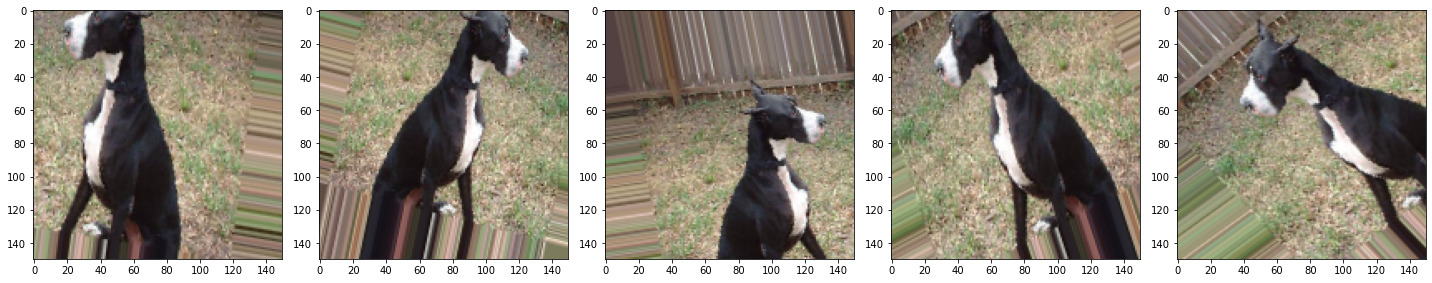

In [8]:
augmented_images = [train_data_gen[0][0][0] for i in range(5)]
plotImages(augmented_images)

#### Preprocessing images

In [9]:
image_gen_val = ImageDataGenerator(rescale=1./255)

val_data_gen = image_gen_val.flow_from_directory(batch_size=BATCH_SIZE,
                                                 directory=validation_dir,
                                                 target_size=(IMG_SHAPE, IMG_SHAPE),
                                                 class_mode='binary')

image_gen_test = ImageDataGenerator(rescale=1./255)

test_data_gen = image_gen_test.flow_from_directory(batch_size=BATCH_SIZE,
                                                 directory=test_dir,
                                                 target_size=(IMG_SHAPE, IMG_SHAPE),
                                                 class_mode='binary')

Found 1000 images belonging to 2 classes.
Found 21 images belonging to 2 classes.


In [10]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(150, 150, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),

    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),

    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),

    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),

    tf.keras.layers.Dropout(0.6),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(2)
])

```
Display model parameters and details
```

In [11]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 148, 148, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 74, 74, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 72, 72, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 36, 36, 64)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 34, 34, 128)       73856     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 17, 17, 128)      0

#### Defining model parameters

In [12]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [13]:
epochs=100
history = model.fit(
    train_data_gen,
    steps_per_epoch=int(np.ceil(total_train / float(BATCH_SIZE))),
    epochs=epochs,
    validation_data=val_data_gen,
    validation_steps=int(np.ceil(total_validation / float(BATCH_SIZE))),
    verbose= 1
)

Epoch 1/100
20/20 [==============================] - 52s 988ms/step - loss: 0.7087 - accuracy: 0.4975 - val_loss: 0.6901 - val_accuracy: 0.5580
Epoch 2/100
20/20 [==============================] - 16s 800ms/step - loss: 0.6915 - accuracy: 0.5180 - val_loss: 0.6870 - val_accuracy: 0.5000
Epoch 3/100
20/20 [==============================] - 17s 840ms/step - loss: 0.6792 - accuracy: 0.5555 - val_loss: 0.6646 - val_accuracy: 0.5840
Epoch 4/100
20/20 [==============================] - 16s 810ms/step - loss: 0.6680 - accuracy: 0.5615 - val_loss: 0.6460 - val_accuracy: 0.5920
Epoch 5/100
20/20 [==============================] - 16s 794ms/step - loss: 0.6632 - accuracy: 0.5720 - val_loss: 0.7073 - val_accuracy: 0.5850
Epoch 6/100
20/20 [==============================] - 16s 791ms/step - loss: 0.6515 - accuracy: 0.6015 - val_loss: 0.6442 - val_accuracy: 0.5700
Epoch 7/100
20/20 [==============================] - 28s 1s/step - loss: 0.6371 - accuracy: 0.6180 - val_loss: 0.5989 - val_accuracy: 0.

20/20 [==============================] - 11s 536ms/step - loss: 0.3727 - accuracy: 0.8290 - val_loss: 0.4217 - val_accuracy: 0.8080
Epoch 59/100
20/20 [==============================] - 11s 541ms/step - loss: 0.3866 - accuracy: 0.8215 - val_loss: 0.4284 - val_accuracy: 0.7950
Epoch 60/100
20/20 [==============================] - 12s 585ms/step - loss: 0.3641 - accuracy: 0.8470 - val_loss: 0.4140 - val_accuracy: 0.8100
Epoch 61/100
20/20 [==============================] - 11s 539ms/step - loss: 0.3726 - accuracy: 0.8365 - val_loss: 0.4065 - val_accuracy: 0.8220
Epoch 62/100
20/20 [==============================] - 11s 538ms/step - loss: 0.3576 - accuracy: 0.8475 - val_loss: 0.4280 - val_accuracy: 0.7920
Epoch 63/100
20/20 [==============================] - 11s 539ms/step - loss: 0.3766 - accuracy: 0.8330 - val_loss: 0.4061 - val_accuracy: 0.8030
Epoch 64/100
20/20 [==============================] - 11s 537ms/step - loss: 0.3758 - accuracy: 0.8290 - val_loss: 0.4135 - val_accuracy: 0.822

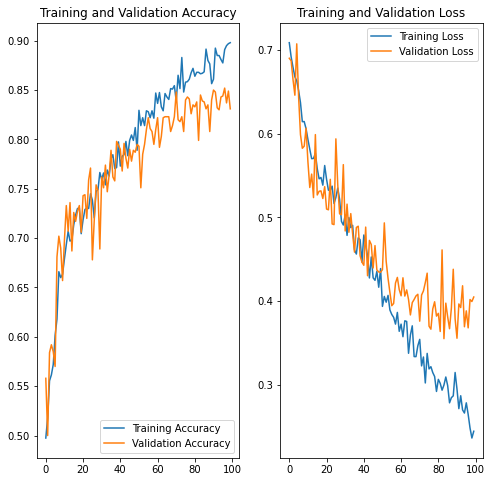

In [14]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy'] 

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

#### Evaluation

In [17]:
results = model.evaluate(test_data_gen)
print("test_loss, test accuracy",results)

1/1 [==============================] - 0s 323ms/step - loss: 0.0854 - accuracy: 1.0000
test_loss, test accuracy [0.08544570952653885, 1.0]


In [19]:
model.save('Cat_vs_dogs_classification.h5')